In [298]:
#import all the necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from keras.models import Model
from keras.layers import Input, Dense
from keras import regularizers

In [299]:
#read the data
df = pd.read_csv("C:\\Users\\tejan\\Downloads\\practicedata\\rowslessthandimensions_data.csv")

In [300]:
df.head()

,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014,POPESTIMATE2015,POPESTIMATE2016,POPESTIMATE2017,...,RDOMESTICMIG2015,RDOMESTICMIG2016,RDOMESTICMIG2017,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017
0,4779736,4780135,4785579,4798649,4813946,4827660,4840037,4850858,4860545,4874747,...,-0.32,-0.40,0.79,0.45,0.94,1.36,0.69,0.68,0.56,1.71
1,710231,710249,714015,722259,730825,736760,736759,737979,741522,739795,...,-11.12,-6.92,-13.42,0.62,1.78,-1.88,-10.37,-7.99,-4.38,-11.32
2,6392017,6392309,6407002,6465488,6544211,6616124,6706435,6802262,6908642,7016270,...,6.69,9.01,9.06,3.18,6.38,5.50,8.10,9.12,11.42,11.39
3,2915918,2916031,2921737,2938640,2949208,2956780,2964800,2975626,2988231,3004279,...,-0.05,0.39,1.57,2.62,0.53,0.16,-0.08,1.14,1.59,2.74
4,37253956,37254518,37327690,37672654,38019006,38347383,38701278,39032444,39296476,39536653,...,-2.08,-3.12,-3.51,2.02,2.41,2.06,2.65,2.24,1.18,0.68


In [301]:
df.shape

(51, 116)

The data has 51 rows and 116 columns. This is a perfect example of high-dimensional data. I will now use PCA and Autoencoders to reduce the dimensionality of the data and then reconstruct the original data using the reduced dimensions. The reconstruction error will be used to compare the merits of using PCA vs AutoEncoders for unsupervised data reduction.

In [302]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CENSUS2010POP,51.00,"6,053,834.08","6,823,984.27","563,626.00","1,696,961.50","4,339,367.00","6,636,084.50","37,253,956.00"
ESTIMATESBASE2010,51.00,"6,054,080.49","6,824,211.98","563,767.00","1,696,988.50","4,339,340.00","6,636,176.50","37,254,518.00"
POPESTIMATE2010,51.00,"6,065,459.24","6,839,052.31","564,376.00","1,700,434.00","4,347,948.00","6,653,164.50","37,327,690.00"
POPESTIMATE2011,51.00,"6,110,672.16","6,907,788.38","567,602.00","1,712,410.50","4,368,505.00","6,715,666.50","37,672,654.00"
POPESTIMATE2012,51.00,"6,156,730.82","6,977,166.35","576,608.00","1,724,767.50","4,383,673.00","6,775,263.00","38,019,006.00"
POPESTIMATE2013,51.00,"6,200,676.57","7,042,373.29","582,341.00","1,731,260.00","4,399,121.00","6,837,274.00","38,347,383.00"
POPESTIMATE2014,51.00,"6,247,500.49","7,116,417.27","583,334.00","1,739,007.50","4,410,415.00","6,902,428.00","38,701,278.00"
POPESTIMATE2015,51.00,"6,294,898.80","7,191,254.03","586,102.00","1,744,545.50","4,422,057.00","6,977,540.00","39,032,444.00"
POPESTIMATE2016,51.00,"6,341,292.84","7,257,151.12","584,910.00","1,754,331.50","4,436,113.00","7,094,788.00","39,296,476.00"
POPESTIMATE2017,51.00,"6,386,650.55","7,316,763.25","579,315.00","1,766,400.00","4,454,189.00","7,211,006.50","39,536,653.00"


The data seems to have outliers and skewness in the variables. So, standardize the data to having a mean of 0 and standard deviation of 1.

In [303]:
#Scale the data using standardscaler before performing PCA
df_scaled = StandardScaler().fit_transform(df)

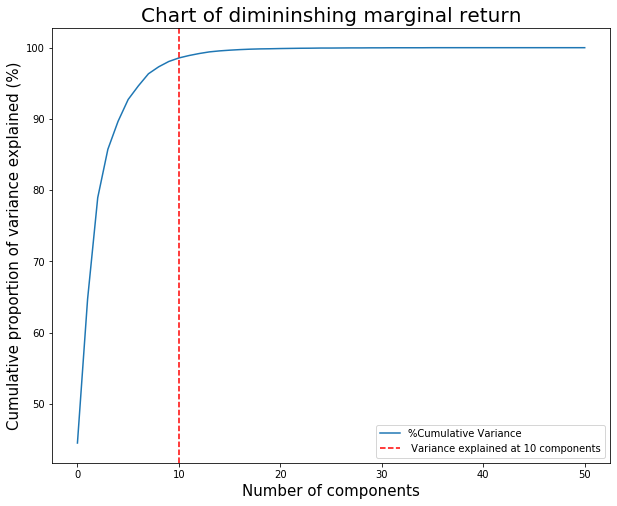

In [304]:
#Extract principal components from the data. Then plot the cumulative variance explained for each component.
pca = PCA(random_state = 123).fit(df_scaled)

#customize the plots
plt.figure(figsize=(10,8))
plt.plot(np.round(np.cumsum(pca.explained_variance_ratio_), decimals = 4)*100, label = '%Cumulative Variance')
plt.xlabel('Number of components', fontsize = 15)
plt.ylabel('Cumulative proportion of variance explained (%)', fontsize = 15)
plt.title("Chart of dimininshing marginal return" , fontsize = 20)
plt.legend()

#Plot a vertical line at 10th component.
plt.axvline(x=10, color='red', linestyle='--', label = ' Variance explained at 10 components')
plt.legend()
plt.show()

By taking 10 components, we can extract around 98% of the variance of the data. Lets see the reconstruction error for a given number of components. I will define a function that outputs the error and variance explained for a given number of components.

In [314]:
def PCA_Reconstruction_Error(components):
    pca = PCA(n_components=components, random_state=123)
    
    #fit PCA for i components   
    pca_results = pca.fit_transform(df_scaled)

    #project the transformations back
    pca_proj_back = pca.inverse_transform(pca_results)

    #calculate the mean squared error 
    loss = ((df_scaled - pca_proj_back) ** 2).mean()
        
    #calculate the cumulative proportion of variance explained
    cum_var = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

    print("The reconstruction error for {} components is {:.3f}".format(components, loss))
    print("The cumulative variance explained for {} components is {:.2f}%".format(components, cum_var[components-1]))

In [315]:
PCA_Reconstruction_Error(10)

The reconstruction error for 10 components is 0.019
The cumulative variance explained for 10 components is 98.06%


Now, lets see how the reconstruction error chages as we increase in the number of components. if we dont see a very low error at 10 components, we may have to rethink about whether to take 10 components or not.

In [308]:
#define empty lists for loss and number of components
Loss = []
components = []

#extract upto 50 components
for i in range(1,51):
    
    #fit PCA for i components
    pca = PCA(n_components=i, random_state=123)  
    pca_results = pca.fit_transform(data_scaled)

    #project the transformations back
    pca_proj_back = pca.inverse_transform(pca_results)

    #calculate the mean squared error 
    loss = ((data_scaled - pca_proj_back) ** 2).mean()
    Loss.append(loss)
    components.append(i)

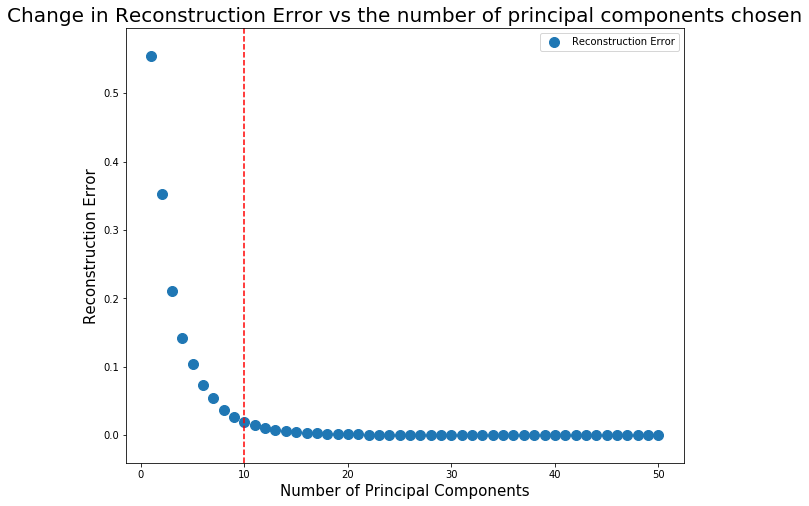

In [309]:
fig = plt.figure(figsize = (10,8))
plt.scatter(components, Loss, s = 100, label = 'Reconstruction Error')
plt.xlabel('Number of Principal Components', fontsize = 15)
plt.ylabel('Reconstruction Error', fontsize = 15)
plt.title('Change in Reconstruction Error vs the number of principal components chosen', fontsize = 20)
plt.axvline(x=10, color='red', linestyle='--')
plt.legend()
plt.show()

From the above graphs, taking 10 components seems to be really good choice. We are reducing the number of features from 116 to 10 and yet retaining 98.06% of the variance in the data.

Lets, implement an autoencoder to extract 10 components and see the reconstruction error. I will use linear activation function and run the model for 200 epochs. 

In [310]:
epochs = 200
input_dim = df.shape[1] #num of predictor variables, 116
encoding_dim = 10 #number of features to be extrated,  10 because we extracted 10 components from pca

#start building the layers. Add 7 encoder layers and 7 decoder layers.
input_layer = Input(shape=(input_dim, ))
encoder_layer_1 = Dense(100, activation="linear")(input_layer)
encoder_layer_2 = Dense(80, activation="linear")(encoder_layer_1)
encoder_layer_3 = Dense(60, activation="linear")(encoder_layer_2)
encoder_layer_4 = Dense(40, activation="linear")(encoder_layer_3)
encoder_layer_5 = Dense(30, activation="linear")(encoder_layer_4)
encoder_layer_6 = Dense(20, activation="linear")(encoder_layer_5)
encoder_layer_7 = Dense(encoding_dim, activation="linear")(encoder_layer_6)
 
decoder_layer_7 = Dense(encoding_dim, activation="linear")(encoder_layer_7)
decoder_layer_6 = Dense(20, activation="linear")(decoder_layer_7)
decoder_layer_5 = Dense(30, activation="linear")(encoder_layer_6)
decoder_layer_4 = Dense(40, activation="linear")(encoder_layer_5)
decoder_layer_3 = Dense(60, activation="linear")(encoder_layer_4)
decoder_layer_2 = Dense(80, activation="linear")(decoder_layer_3)
decoder_layer_1 = Dense(100, activation="linear")(decoder_layer_2)
output_layer = Dense(input_dim, activation="linear")(decoder_layer_1)

#build the encoder model 
encoder = Model(inputs=input_layer, outputs=output_layer)

#compile the model
encoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

#view the model summary
encoder.summary()

#create a history object
encoder_history = encoder.fit(df_scaled, df_scaled, epochs=epochs, shuffle=False, verbose=0)

Model: "model_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        (None, 116)               0         
_________________________________________________________________
dense_305 (Dense)            (None, 100)               11700     
_________________________________________________________________
dense_306 (Dense)            (None, 80)                8080      
_________________________________________________________________
dense_307 (Dense)            (None, 60)                4860      
_________________________________________________________________
dense_308 (Dense)            (None, 40)                2440      
_________________________________________________________________
dense_316 (Dense)            (None, 60)                2460      
_________________________________________________________________
dense_317 (Dense)            (None, 80)                488

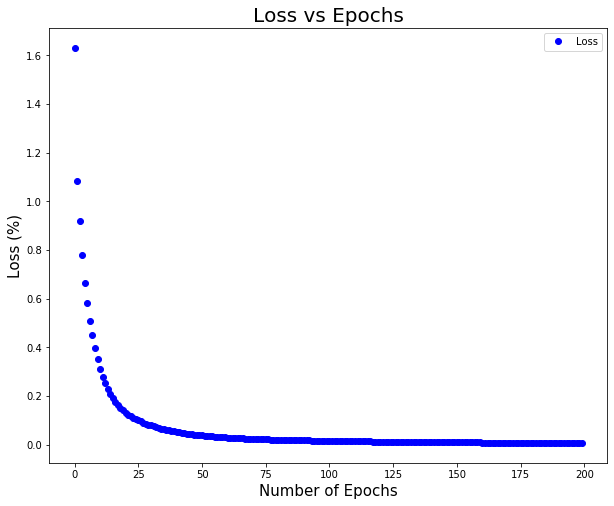

In [311]:
#plot the loss vs epochs chart
#convert the loss values to an array 
loss = np.array(encoder_history.history['loss'])
epochs = range(epochs)
fig = plt.figure(figsize = (10,8))
plt.plot(epochs, loss, 'bo', label='Loss')
plt.xlabel('Number of Epochs', fontsize = 15)
plt.ylabel('Loss (%)', fontsize = 15)
plt.title('Loss vs Epochs', fontsize = 20)
plt.legend()
plt.show()

In [313]:
#calculate the reconstruction error
predictions = encoder.predict(data_scaled)
print('Reconstruction error for {} extracted features is {:.3f}'. format(10, sklearn.metrics.mean_squared_error(df_scaled, predictions)))

Reconstruction error for 10 extracted features is 0.007


The reconstruction error for the 7 layer auto encoder model is 0.007 and for PCA is 0.019. We almost achieved a third of the error of the PCA model by building auto encoders. The components of the autoencoders may not be orthogonal like the pca components but they can be more effective in certain cases as we saw in this analysis. By trying other activation functions like relu or sigmoid, or by training on more epochs, we can get even better accuracy from the autoencoders.